In [15]:
import io
import os
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
data_root = 'ml-100k/'

In [17]:
!ls 'ml-100k/'

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [18]:
!cat ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [19]:
# 100000 rating from 943 users on 1683 movies
# each user minimum 20 movies
# demographi information user
# and movies information

In [24]:
columns = ["user_id","item_id","rating", "timestamp"]
datafile=os.path.join(data_root,"u.data")
data = pd.read_csv(datafile, sep='\t',names=columns)
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
n_users = data.user_id.unique().shape
n_items = data.item_id.unique().shape
n_users, n_items

((943,), (1682,))

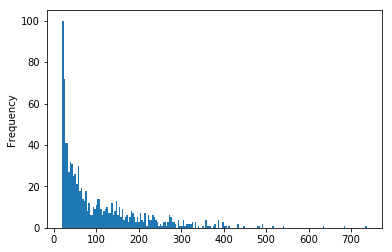

In [30]:
data.groupby('user_id').count()['item_id'].plot(kind='hist',bins=200)

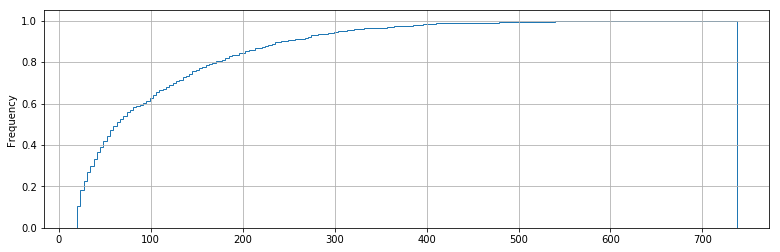

In [34]:
#plot CDF --> cumulative distribution function
data.groupby('user_id').count()['item_id'].plot(kind='hist',bins=200, normed=1,histtype='step',cumulative=True,figsize=(13,4), grid=True)

In [36]:
items_id_file = os.path.join(data_root, "u.item")
!head $items_id_file
 
# Create a dictionary for movie titles and ids
item_dict = {}
with io.open(items_id_file, 'r', encoding='ISO-8859-1') as f:
    for line in f.readlines():
        record = line.split('|')
        item_dict[int(record[0])] = str(record[1])
 
# We can use this dict to see the films a user has seen, for instance.
for record in data.values[:20]:
    print("User {u} viewed '{m}' and gave a {r} rating".format(u=record[0], m=item_dict[record[1]], r=record[2]))    
 
# Define a function that retrieves all the ids and titles for movies containing 'text' in its title
def returnItemId(text, ids):
    """
   :param text: string to be looked for in movies titles
   :param ids: dicttionary of {id:title}
   
   :return: a list of (id,title) if text found in titles, and an empty list otherwise.
   """
    search = [(k, v.lower().find(text.lower())) for k, v in list(ids.items())]
    index = [k for k, v in search if v>-1]
   
    return zip(index, [ids[i] for i in index]) if len(index)>0 else []

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [40]:
duplicates_item_dict={}
i = 0
for k,v in list(item_dict.items()):
    duplicates_item_dict[v] = [k] if v not in duplicates_item_dict else duplicates_item_dict[v]+[k]

for k,v in list(duplicates_item_dict.items()):
    if len(v)>1:
        print(k,v)

Chasing Amy (1997) [246, 268]
Kull the Conqueror (1997) [266, 680]
Ulee's Gold (1997) [297, 303]
Fly Away Home (1996) [304, 500]
Ice Storm, The (1997) [305, 865]
Deceiver (1997) [309, 1606]
Desperate Measures (1998) [329, 348]
Body Snatchers (1993) [573, 670]
Substance of Fire, The (1996) [711, 1658]
Money Talks (1997) [876, 881]
That Darn Cat! (1997) [878, 1003]
Hugo Pool (1997) [1175, 1617]
Chairman of the Board (1998) [1234, 1654]
Designated Mourner, The (1997) [1256, 1257]
Hurricane Streets (1998) [1395, 1607]
Sliding Doors (1998) [1429, 1680]
Nightwatch (1997) [1477, 1625]
Butcher Boy, The (1998) [1645, 1650]
